## Observations and Insights

The most promising treatment is Ramicane base on the lowest statistics values for the tumor volume.

Base on the scatter plot it could be assume that the higher the weight, the higher tumor mass a mouse has. 

In case of mouse L508, it reduced his mass by 5 mm3 in 35 timepoints. Proving that the drug benefit it thought time

# Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_results = pd.merge(study_results,mouse_metadata,on='Mouse ID',how='left')
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_byreg = mouse_results.groupby('Drug Regimen')
tumor_column = mouse_byreg['Tumor Volume (mm3)']
tumor_mean = tumor_column.mean()
tumor_median = tumor_column.median()
tumor_var = tumor_column.var()
tumor_std = tumor_column.std()
tumor_sem = tumor_column.sem()

# Summary table
summary_table = pd.DataFrame({'Mean':tumor_mean,'Median':tumor_median,'Variance':tumor_var,'Standar Deviation':tumor_std,'Standar Error':tumor_sem})

# Format table
summary_table = summary_table.round(2)

# Print
summary_table

,Mean,Median,Variance,Standar Deviation,Standar Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

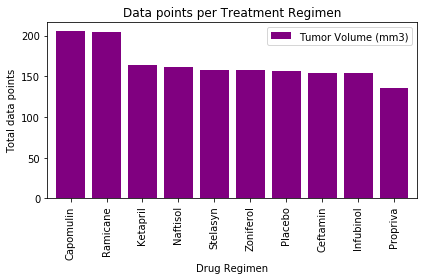

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas (tabla)
mouse_byreg_unique = mouse_byreg.nunique()
mouse_byreg_unique_df = pd.DataFrame(mouse_byreg_unique['Tumor Volume (mm3)']).sort_values(by=['Tumor Volume (mm3)'],ascending=False)
mouse_byreg_unique_df.plot(kind='bar',title='Data points per Treatment Regimen',color='purple',width=.8)
plt.ylabel("Total data points")
plt.tight_layout()
plt.show()


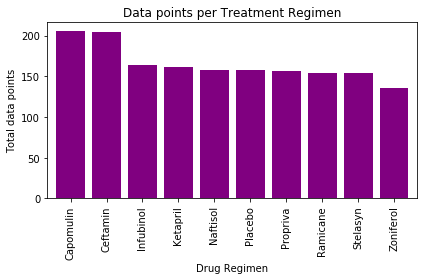

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(mouse_byreg_unique_df['Tumor Volume (mm3)']))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, mouse_byreg_unique_df['Tumor Volume (mm3)'], color = 'purple', align="center")
plt.xticks(tick_locations, pd.DataFrame(mouse_byreg)[0], rotation="vertical")
plt.title("Data points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total data points")
plt.xlim(-0.65, len(x_axis)-.35)
plt.tight_layout()
plt.show()

## Pie plots

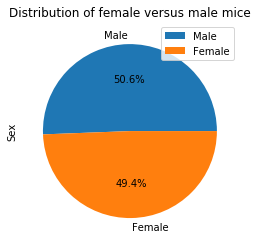

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = pd.DataFrame(mouse_results['Sex'].value_counts())
mouse_sex.plot(kind='pie',y='Sex',title='Distribution of female versus male mice',autopct="%1.1f%%")
plt.show()

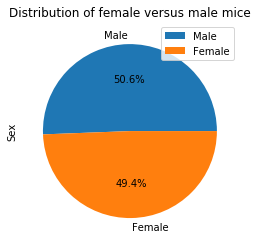

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex, labels=['Male','Female'],autopct="%1.1f%%")
plt.legend(['Male','Female'])
plt.title('Distribution of female versus male mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Capomulin
treatment_capo = mouse_results.loc[mouse_results['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']

quartiles_capo = treatment_capo.quantile([.25,.5,.75])
lowerq_capo = quartiles_capo[0.25]
upperq_capo = quartiles_capo[0.75]
iqr_capo = upperq_capo-lowerq_capo

lower_bound_capo = lowerq_capo - (1.5*iqr_capo)
upper_bound_capo = upperq_capo + (1.5*iqr_capo)

outlier_volumes_capo = treatment_capo.loc[(treatment_capo < lower_bound_capo) | (treatment_capo > upper_bound_capo)]

# # Ramicane
treatment_rami = mouse_results.loc[(mouse_results['Drug Regimen']=='Ramicane')]['Tumor Volume (mm3)']

quartiles_rami = treatment_rami.quantile([.25,.5,.75])
lowerq_rami = quartiles_rami[0.25]
upperq_rami = quartiles_rami[0.75]
iqr_rami = upperq_rami-lowerq_rami

lower_bound_rami = lowerq_rami - (1.5*iqr_rami)
upper_bound_rami = upperq_rami + (1.5*iqr_rami)

outlier_volumes_rami = treatment_rami.loc[(treatment_rami < lower_bound_rami) | (treatment_rami > upper_bound_rami)]

# Infubinol
treatment_infu = mouse_results.loc[(mouse_results['Drug Regimen']=='Infubinol')]['Tumor Volume (mm3)']

quartiles_infu = treatment_infu.quantile([.25,.5,.75])
lowerq_infu = quartiles_infu[0.25]
upperq_infu = quartiles_infu[0.75]
iqr_infu = upperq_infu-lowerq_infu

lower_bound_infu = lowerq_infu - (1.5*iqr_infu)
upper_bound_infu = upperq_infu + (1.5*iqr_infu)

outlier_volumes_infu = treatment_infu.loc[(treatment_infu < lower_bound_infu) | (treatment_infu > upper_bound_infu)]

# Ceftamin
treatment_ceft = mouse_results.loc[(mouse_results['Drug Regimen']=='Ceftamin')]['Tumor Volume (mm3)']

quartiles_ceft = treatment_ceft.quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
iqr_ceft = upperq_ceft-lowerq_ceft

lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)

outlier_volumes_ceft = treatment_ceft.loc[(treatment_ceft < lower_bound_ceft) | (treatment_ceft > upper_bound_ceft)]

# Print number of outliers
print(f'There could be {len(outlier_volumes_capo)} outliers for Capomulin, base on the IQR information above')
print(f'There could be {len(outlier_volumes_rami)} outliers for Ramicane, base on the IQR information above')
print(f'There could be {len(outlier_volumes_infu)} outliers for Infubinol, base on the IQR information above')
print(f'There could be {len(outlier_volumes_ceft)} outliers for Ceftamin, base on the IQR information above')
# Capomulin, Ramicane, Infubinol, and Ceftamin

There could be 2 outliers for Capomulin, base on the IQR information above
There could be 1 outliers for Ramicane, base on the IQR information above
There could be 0 outliers for Infubinol, base on the IQR information above
There could be 0 outliers for Ceftamin, base on the IQR information above


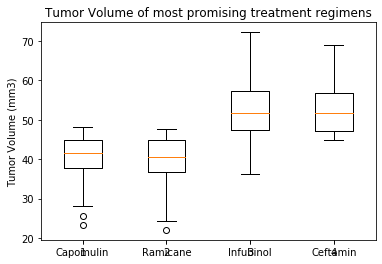

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [treatment_capo,treatment_rami,treatment_infu,treatment_ceft]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of most promising treatment regimens')
plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol','Ceftamin'])
ax1.set_ylabel('Tumor Volume (mm3)')
plt.boxplot(data)
plt.show()

## Line and scatter plots

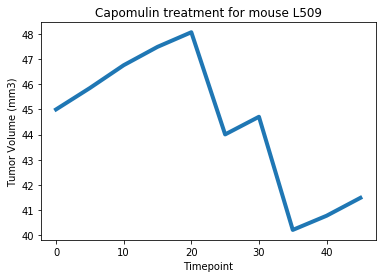

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_values_plot = mouse_results.loc[mouse_results['Drug Regimen']=='Capomulin']['Timepoint'][mouse_results['Mouse ID']=='l509']
y_values_plot = mouse_results.loc[mouse_results['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)'][mouse_results['Mouse ID']=='l509']

plt.plot(x_values_plot,y_values_plot, linewidth=4)
plt.title('Capomulin treatment for mouse L509')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

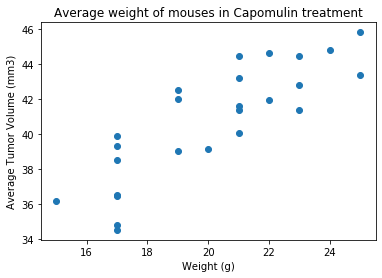

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_capo = mouse_results.loc[mouse_results['Drug Regimen']=='Capomulin']
mouse_bymouse = mouse_capo.groupby('Mouse ID')
mouse_byID = mouse_capo.loc[:,['Mouse ID','Weight (g)']].drop_duplicates()

scatter_pd = pd.merge(mouse_byID,pd.DataFrame(mouse_bymouse['Tumor Volume (mm3)'].mean()),on='Mouse ID')

x_values_scatter = scatter_pd['Weight (g)']
y_values_scatter = scatter_pd['Tumor Volume (mm3)']

plt.scatter(x_values_scatter,y_values_scatter)
plt.title('Average weight of mouses in Capomulin treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

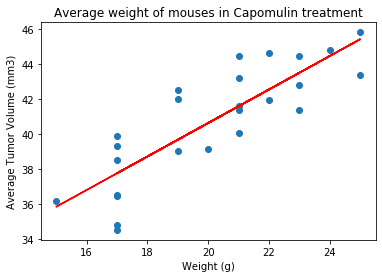

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

capo_slope, capo_int, capo_r, capo_p, capo_std_err = st.linregress(x_values_scatter, y_values_scatter)

capo_fit = capo_slope * x_values_scatter + capo_int

plt.scatter(x_values_scatter,y_values_scatter)
plt.plot(x_values_scatter,capo_fit,"r-")
plt.title('Average weight of mouses in Capomulin treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()